In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

In [74]:
data = pd.read_csv('./balance-scale2.csv')
data.head()

,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [75]:
print(np.unique(data['Class'], return_counts=True))
le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])
print(np.unique(data['Class'], return_counts=True))

(array(['B', 'L', 'R'], dtype=object), array([ 49, 288, 288]))
(array([0, 1, 2]), array([ 49, 288, 288]))


In [76]:
x_var = data.drop(columns='Class', axis=1)
y_var = data['Class']
x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.3)
mse = []
k = []
x = []
y = []
for i in range(1, 80):
    model = KNeighborsClassifier(i)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mse.append(mean_squared_error(y_test, predictions))
    k.append(i)
for i in range(1,80):
    x.append(mse.index(min(mse))+1)
    y.append(min(mse))



In [77]:
print(mse)

[0.5531914893617021, 0.8138297872340425, 0.5053191489361702, 0.5319148936170213, 0.39361702127659576, 0.30319148936170215, 0.2127659574468085, 0.2074468085106383, 0.17553191489361702, 0.1595744680851064, 0.16489361702127658, 0.19148936170212766, 0.19148936170212766, 0.15425531914893617, 0.1702127659574468, 0.16489361702127658, 0.14893617021276595, 0.14893617021276595, 0.15425531914893617, 0.1702127659574468, 0.18085106382978725, 0.20212765957446807, 0.18085106382978725, 0.17553191489361702, 0.19680851063829788, 0.18085106382978725, 0.20212765957446807, 0.17553191489361702, 0.1702127659574468, 0.16489361702127658, 0.20212765957446807, 0.20212765957446807, 0.18617021276595744, 0.18085106382978725, 0.16489361702127658, 0.19680851063829788, 0.16489361702127658, 0.1702127659574468, 0.15425531914893617, 0.15425531914893617, 0.16489361702127658, 0.14893617021276595, 0.14893617021276595, 0.13297872340425532, 0.14893617021276595, 0.14893617021276595, 0.14893617021276595, 0.14893617021276595, 0.

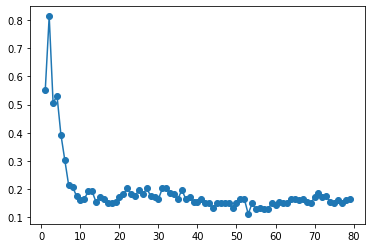

In [78]:
plt.scatter(np.arange(1, 80,step=1), mse)
plt.plot(np.arange(1, 80, step=1), mse)
plt.show()